##Actividad Semanal -- 5 Repaso Transformacion y reduccion de dimensiones

###Denisse Maria Ramirez Colmenero     

###A01561497 

Materia: Ciencia y Analítica de Datos 

Profesora: Dra. Maria de la Paz Rico Fernandez 

Fecha de entrega: 27 de Octubre de 2022 


--------------------------------------------------------


# Bienvenido al notebook#


Repaso de Reducción de dimensiones


El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayudena entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:*Truco: Prueba entrar con tu cuenta del tec :)*https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)

##Eigenvalores y eigenvectores 

In [ ]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B=W.dot(D).dot(Winv) 
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


##Ejercicio 1 

***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




In [ ]:
#MATRIZ 1 
# define la matriz
A1 = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print("-------Matriz original-------")
print(A1)
print("-----------------------------")

# calcula la eigendescomposición
#Eigen descomposition es encontrar un nuevo sistema de coordenadas de los vectores eigen para C. 
values1, vectors1 = eig(A1) #los eigenvalues son los coeficientes que tienen los eigen vectors
print(values1) #D, es el simbolo lamda en matemáticas, es la diagonal de la matriz  
print(vectors1) #W 

#Ejemplo de reconstrucción
values1, vectors1 = np.linalg.eig(A1)

W1 = vectors1
Winv1 = np.linalg.inv(W1)
D1 = np.diag(values1)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
#Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
B1=np.round(np.dot(W1,np.dot(D1,Winv1))) #si no se redondea, puede haber numeros imaginarios. 
print(B1)
print("-----------------------------")

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------Matriz reconstruida-------
[[ 3.+0.j  0.-0.j  2.-0.j]
 [ 3.-0.j  0.+0.j -2.+0.j]
 [ 0.-0.j  1.-0.j  1.+0.j]]
-----------------------------


In [ ]:
A1==B1#para confirmar 

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [ ]:
#MATRIZ 2 
# define la matriz
A2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
print("-------Matriz original-------")
print(A2)
print("-----------------------------")

# calcula la eigendescomposición
values2, vectors2 = eig(A2)
print(values2) #D
print(vectors2) #W

#Ejemplo de reconstrucción
values2, vectors2 = np.linalg.eig(A2)

W2 = vectors2
Winv2 = np.linalg.inv(W2)
D2 = np.diag(values2)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
B2=W2.dot(D2).dot(Winv2) 
print(np.round(B2))
print("-----------------------------")

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
[ 3. -2.  1.]
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-------Matriz reconstruida-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
-----------------------------


In [ ]:
A2==B2

array([[ True,  True, False],
       [ True, False, False],
       [ True,  True,  True]])

In [ ]:
#MATRIZ 3
# define la matriz
A3 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
print("-------Matriz original-------")
print(A3)
print("-----------------------------")

# calcula la eigendescomposición
values3, vectors3 = eig(A3) 
print(values3) #D
print(vectors3) #W

#Ejemplo de reconstrucción
values3, vectors3 = np.linalg.eig(A3)

W3 = vectors3
Winv3 = np.linalg.inv(W3)
D3 = np.diag(values3)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
B3=np.round((W3.dot(D3).dot(Winv3)))
print(B3)
print("-----------------------------")

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
[ 6.89167094 -0.214175   -0.67749594]
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-------Matriz reconstruida-------
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]
-----------------------------


In [ ]:
A3==B3

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

**¿Qué significa  reducir dimensiones?**

Esto sera cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los mas importantes y viajemos de regreso a nuestras unidades a traves de una proyeccion.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo graficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



**Singular Value Descomposition(SVD)**

Es otra descomposicion que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">


##Ejercicio 2 

Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


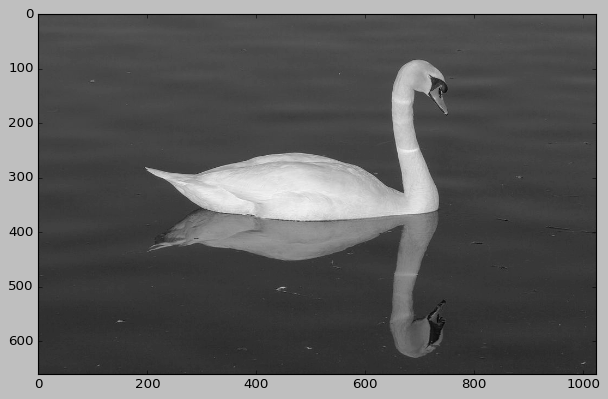

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x660 at 0x7FB4E8BAD310>


In [ ]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg'))
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [ ]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(660, 1024)

In [ ]:
U.shape

(660, 660)

In [ ]:
V.shape

(1024, 1024)

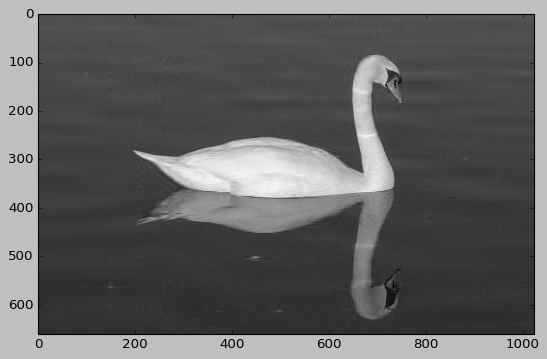

Felicidades la imagen está comprimida


In [ ]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

Ahora es tu turno! Comprime 3 imágenes

###Imagen 1 

[11. 11. 11. ... 31. 31. 31.]


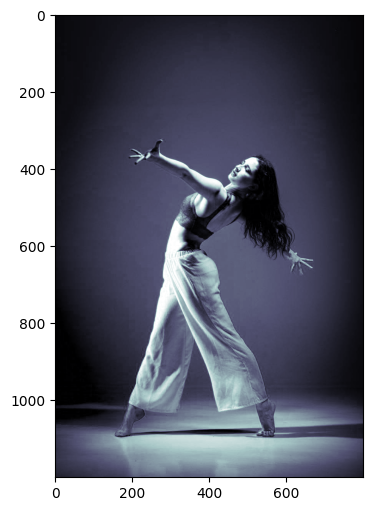

Imagen 1: A través de la danza


In [ ]:
#imagen 1 
plt.style.use('default')
img_1 = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2019/09/danza.jpg'))

imgmat_1 = np.array(list(img_1.getdata(band=0)),float)
print(imgmat_1)

imgmat_1.shape = (img_1.size[1],img_1.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat_1, cmap='bone')
plt.show()
print("Imagen 1: A través de la danza")

In [ ]:
U,D,V = np.linalg.svd(imgmat_1)
imgmat_1.shape

(1200, 800)

In [ ]:
U.shape

(1200, 1200)

In [ ]:
V.shape

(800, 800)

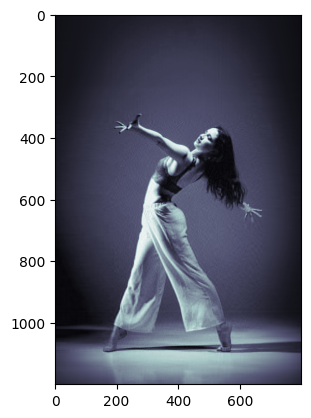

Felicidades la imagen está comprimida


In [ ]:
#Siendo 1200 como esta los datos originales, escoger el valor donde la imagen se vea casi igual. 
#Con 80 puntos conservamos lo que aporta más a los datos de la imagen. 
nvalue_1 = 80
#------------------------------
reconstimg = np.matrix(U[:,:nvalue_1])*np.diag(D[:nvalue_1])*np.matrix(V[:nvalue_1,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(1200X1200)D(1200X800)V(800x800)
        #=U(1200Xnvalues)D(nvaluesXnvalue)V(nvaluesx800)

        #=U(1200X80)(80X80)(80X800)
plt.imshow(reconstimg,cmap='bone')
plt.show()
print("Felicidades la imagen está comprimida")

###Imagen 2 

[246. 246. 246. ... 173. 172. 172.]


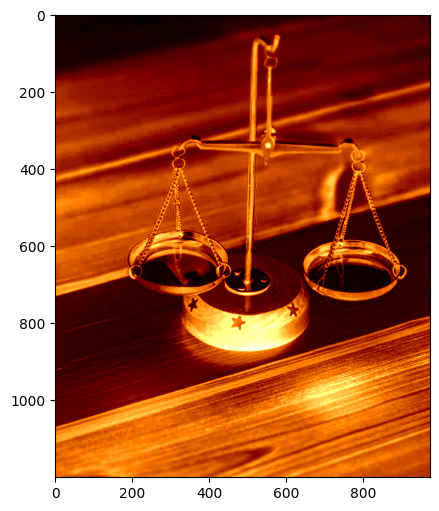

Imagen 2: Simbolismo de la balanza


In [ ]:
#imagen 2
plt.style.use('default')
img_2 = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2022/04/balanza.jpg'))

imgmat_2 = np.array(list(img_2.getdata(band=0)),float)
print(imgmat_2)

imgmat_2.shape = (img_2.size[1],img_2.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat_2, cmap='afmhot_r')
plt.show()
print("Imagen 2: Simbolismo de la balanza")

In [ ]:
U2,D2,V2 = np.linalg.svd(imgmat_2)
imgmat_2.shape

(1200, 974)

In [ ]:
U2.shape

(1200, 1200)

In [ ]:
V2.shape

(974, 974)

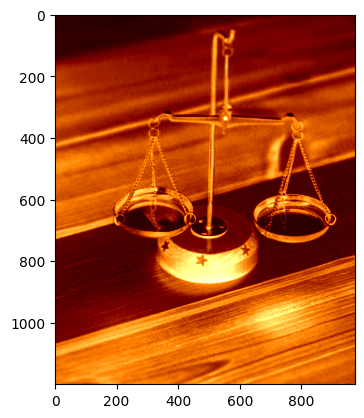

Felicidades la imagen está comprimida


In [ ]:
#Siendo 1200 como esta los datos originales, escoger el valor donde la imagen se vea casi igual. 
#Con 95 puntos conservamos lo que aporta más a los datos de la imagen. 
nvalue_2 = 95
#------------------------------
reconstimg_2 = np.matrix(U2[:,:nvalue_2])*np.diag(D2[:nvalue_2])*np.matrix(V2[:nvalue_2,:])
#ve las dimensiones de la imagen y su descomposicion
#1200x974= U(1200X1200)D(1200X974)V(974x974)
        #=U(1200Xnvalues)D(nvaluesXnvalue)V(nvaluesx974)

        #=U(1200X95)(95X95)(95X974)
plt.imshow(reconstimg_2,cmap='afmhot_r')
plt.show()
print("Felicidades la imagen está comprimida")

#Con 70 las cadenas ya no se alcanzan a distinguir 
#Hata el 95 las cadenas ya se ven bien 

###Imagen 3 

[255. 255. 254. ... 255. 255. 255.]


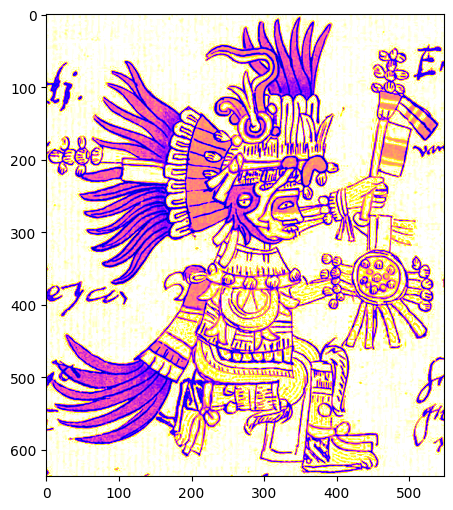

Imagen 3: Representación del dios azteca Huitzilopochtli. Codex Telleriano-Remensis (siglo XVI).


In [ ]:
#imagen 3 
plt.style.use('default')
img_3 = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2014/10/Huitzilopochtli_telleriano.jpg'))

imgmat_3 = np.array(list(img_3.getdata(band=0)),float)
print(imgmat_3)

imgmat_3.shape = (img_3.size[1],img_3.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat_3, cmap='gnuplot2')
plt.show()
print("Imagen 3: Representación del dios azteca Huitzilopochtli. Codex Telleriano-Remensis (siglo XVI).")

In [ ]:
U3,D3,V3 = np.linalg.svd(imgmat_3)
imgmat_3.shape

(637, 548)

In [ ]:
U3.shape

(637, 637)

In [ ]:
V3.shape

(548, 548)

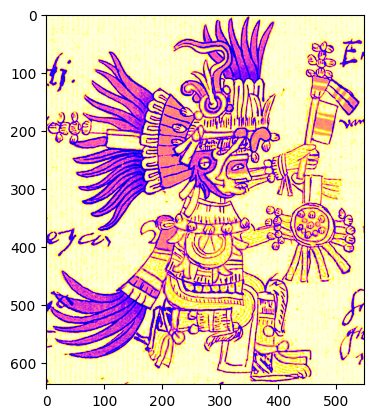

Felicidades la imagen está comprimida


In [ ]:
#Siendo 637 como esta los datos originales, escoger el valor donde la imagen se vea casi igual. 
#Con 480 puntos conservamos lo que aporta más a los datos de la imagen. 
nvalue_3 = 480
#------------------------------
reconstimg_3 = np.matrix(U3[:,:nvalue_3])*np.diag(D3[:nvalue_3])*np.matrix(V3[:nvalue_3,:])

#ve las dimensiones de la imagen y su descomposicion
#637x548= U(637X637)D(637X548)V(548x548)
        #=U(637Xnvalues)D(nvaluesXnvalue)V(nvaluesx548)

        #=U(637X95)(95X95)(95X548)
plt.imshow(reconstimg_3,cmap='gnuplot2')
plt.show()
print("Felicidades la imagen está comprimida")


Comentarios: 

En la imagen con sus dimensiones originales y el color: gnuplot2, podemos ver que el fondo de la imagen se ve blanco, sin embargo al hacer la reduccion podemos ver que es en realidad amarillo y para lograr que la imagen se vea igual que la primera, necesitariamos utilizar un valor de nvalue_3 de casi 500, por lo que para esta imagen en especifico la reduccion de dimensiones no es un proceso tan ideal, pues en realidad al querer contener la mayoria de la informacion estariamos reduciendolo muy poco y no estariamos sacandole mucho provecho. Esto nos demuestra que un metodo puede funcionar mejor para una aplicacion que para otra. 

En conclusion puedo decir que la reduccion de dimensiones SVD funciono mejor para la imagen 1, ya que fue la que necesito el menor valor para mantener la informacion para proyectar esa imagen. De el valor original de 1200, se redujo a tan solo 80. 

##Ejercicio 3 

###Contexto 

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




**PCA**

El analisis de componentes principales (PCA) es un metodo de reduccion de dimensiones no supervisada y busca encontrar combinaciones lineales que tienen las variables originales de las variables originales del conjunto de datos para construir una representacion del dataset con nuevas variables (features). De esta forma se retiene la informacion mas importante del conjunto de datos pero ahora con dimension mucho menor. 

Los datos originales se proyectan en el espacio reducido de PCA utilizando los eigenvectors de la matriz de correlacion. 

--------------------------------------

X = matriz de datos originales 

data shape de X = [n_samples, n_features]

*Las variables de entrada originales tienen media=0 y desviacion estandar 1. 

--------------------------------------

**Pasos para llevar a cabo un PCA**

1. Construir y descomponer la matriz de covarianza: 

        Cx= (1/n)X'X 

  (la covarianza es igual a la matriz de correlacion para los datos z-scored).


2. Los eigen values se clasifican en un orden decreciente que representa la varianza decreciente de los datos. 

3. La transformacion de los datos originales normalizados en el espacio reducido de PCA se obtiene multiplicando (producto punto) los datos originales por los eigen vectors principales de la matriz de covarianza, o sea, los PC. 


Matriz de datos: [n_samples,n_features]

Matriz de covarianza/correlacion: [n_features,n_features] 

Rango maximo de la matriz de covarianza: min(n_samples, n_features).

Esto quiere decir que el rango maximo es el maximo que podemos tener de componentes principales. 


###Ejercicio del tutorial 

In [1]:
#Librerias usadas 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

# datos originales 
iris = datasets.load_iris() #utilizamos los datos que ofrece esta libreria 
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler() #para escalar y transformar lso datos originales 
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) #estimamos solo 2 PC 
X_new = pca.fit_transform(X) #Los datos originales se proyectan en el espacio reducido de PCA

In [2]:
X.shape #la matriz X tiene 4 features 

(150, 4)

In [3]:
X_new.shape

(150, 2)

Graficamos los datos antes y despues del PCA 

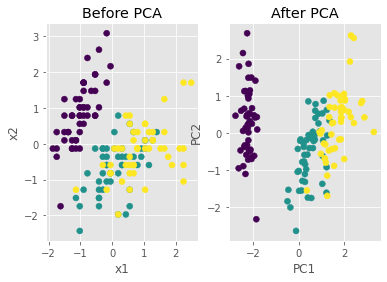

In [4]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')

axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [5]:
print(pca.explained_variance_ratio_)#varianza explicada de cada PC 

[0.72962445 0.22850762]


In [16]:
np.cumsum(pca.explained_variance_ratio_)#la varianza explicada acumulada para los 2 primeros PC es de .9581

array([0.72962445, 0.95813207])

Esto nos dice que el PC1 explica el 72.96% de la varianza de los datos originales y PC2 el 22.85%. De 4 features que habia originalmente, ahora solo se tienen que usar 2 y con esos ya se retiene el 95% de la informacion. 

Los eigen values de la matriz de covarianza original son iguales a las varianzas del espacio reducido

In [6]:
np.cov(X_new.T) #varianzas del espacio reducido (diagonal)

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

El valor de 5.3392e-16 significa la covarianza entre las variables. Mientras que la diagonal representa las varianzas individuales de esas variables. 

In [7]:
pca.explained_variance_ #eigen values de la matriz de covarianza 

array([2.93808505, 0.9201649 ])

Feature Importance 

Los eigen values son la magnitud de los features que tienen los eigen vectors. 

pca.components_ tiene una forma de [n_components, n_features].

En la siguiente celda de codigo podemos ver que para el PC1 (primera fila), sus features mas importantes son el 1, 3 y 4, mientras que para PC2 son el 1 y el 2. 

In [9]:
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


Para entenderlo mejor, graficaremos un biplot del PCA con los features de cada componente (var's). 

In [10]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

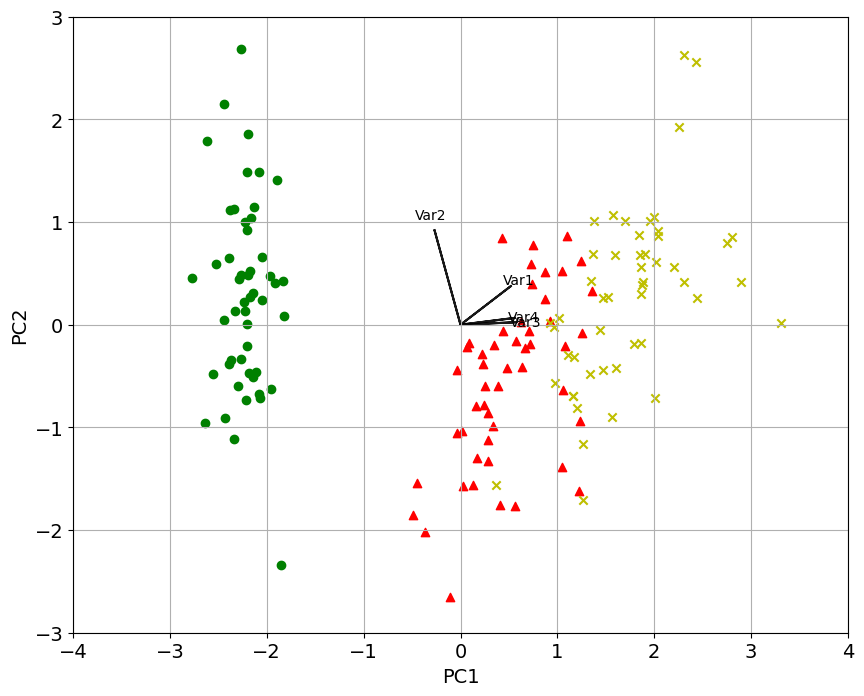

In [11]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

Las flechas indican los features de los PC. Aqui podemos confirmar como para PC1 (eje x), var4, 3 y 1, aportan mas a su construccion, mientras que para PC2 (eje y), var2 es el que más aporta, seguido de var1. 


Los features que apuntan hacia la misma direccion indican correlacion entre las variables que representan, y hacia direccion opuesta, indican contraste. 

Tambien lo podemos confirmar con el siguiente codigo: 

In [12]:
# Var 3 and Var 4 are extremely positively correlated
np.corrcoef(X[:,2], X[:,3])[1,0]

0.9628654314027957

In [13]:
# Var 2and Var 3 are negatively correlated
np.corrcoef(X[:,1], X[:,2])[1,0]


-0.42844010433054014

Realiza un comentario relacionado a los pasos que se llevaron a cabo en este proceso de features importances.


1. ¿Qué es feature importance y para que nos sirve?

Feature importance es una serie de tecnicas que tienen el objetivo de asignarle un valor a cada feature (características, que generalmente son las columnas) en un conjunto de datos segun la importancia o la utilidad que tiene ese feature para poder predecir la variable target (y). A mayor valor, mayor es su importancia. El valor que se le asigna es un número del 0 al 100 y la sumatoria de todos los valores de todas las columnas es 100. 
En general feature importance puede ser aplicado para modelos que busque predecir un valor numerico o en un problema de clasificacion para encontrar una clase y sirve principalmente para reducir las dimensiones de un conjunto de datos, reduciendo así su complejidad, sus calculos y haciendo que sea mas facil de entender tanto los datos como el modelo. Al implementar estas tecnicas podemos saber cuales tienen mas correlacion con la variable target que queremos predecir y de esta forma sacar provecho de ello y hacer que el modelo se base mas en estas variables y la prediccion del modelo sea mejor. 


2. ¿Que hallazgos fueron los más relevantes durante el analisis del ejercicio?

Ademas de lo rapido que es hacer una reduccion de dimensiones utilizando solo algunas lineas de codigo, lo que me parecio muy interesante fue ver que peso tiene cada uno de los features iniciales para la creacion de un componente principal. Uno pensaria que cada feature del conjunto de datos tiene el mismo valor solo por que aporta la misma cantidad de datos, pero es interesante ver que un solo feature tiene más contribucion para predecir nuestra target que otros 5 features juntos. Además tambien me parece importante ver que caracteristicas estan fuertemente correlacionadas con cual, ya que nos puede ayudar a comprender mejor los datos y asegurarnos de mantener los datos necesarios para un buen modelo y no caer en la equivocacion de borrar un dato que si estaba correlacionado fuertemente con una variable importante o incluso con la variable de salida misma.  

3. ¿Donde lo aplicarias o te seria de utilidad este conocimiento?

Considero que cada paso por si solo y todo el analisis de PCA en su conjunto puede ser muy util para muchas aplicaciones. Puede ser usado para cualquier aplicacion donde se busque un menor tiempo de entrenamiento, reducir los recursos computacionales que utiliza o un rendimiento mas alto de sus algoritmos. 

En lo personal me parecio muy interesante el ejercicio 2 de minimizacion de bytes en una imagen y creo que me seria util ya que tengo muchas fotografias y es una buena manera de mantenerlas todas sin saturar el almacenamiento de mi nube o computador. 

Algunas aplicaciones que se me vienen a la mente pueden ser el uso de PCA para reconocimiento de imagenes para la robotica por ejemplo para reconocer piezas o posiciones de brazos roboticos. Tambien puede ser util por ejemplo para el analisis de rendimiento de estudiantes en una universidad, ya que serian muchas observaciones (estudiantes) y muchas caracteristicas (clases academicas, grupos estudiantiles, deportes, etc).Otro ejemplo podria ser las bases de datos de laboratorios cientificos ya que se recuperan muchos datos provenientes de plantas, animales, bacterias, etc y para detectar alguna anomalia o alguna caracteristica del RNA quiza no se requiera saber todos los datos que fueron almacenados. 

Estos ejercicios fueron de gran ayuda para entender mejor sobre lo que significa reduccion de dimensiones en la ciencia de datos y como hay diferentes metodos para realizarlo y sus grandes posibilidades de implementacion. A pesar de que los tres ejercicios fueron sencillos de realizar, en lo personal considero que explican muy bien el tema. 

Referencias: 

1. Getting Started with Eigendecomposition in Python. (s. f.). Engineering Education (EngEd) Program | Section. Recuperado 24 de octubre de 2022, de https://www.section.io/engineering-education/eigendecomposition-in-python/

2. Mandani, A. (2021, 14 junio). How to Display Images Using Matplotlib Imshow Function. Python Pool. https://www.pythonpool.com/matplotlib-imshow/

3. Las imagenes utilizadas para el ejercicio 2 fueron obtenidas de: https://biblioteca.acropolis.org

4. Loukas, S. (2021, 14 diciembre). PCA clearly explained —When, Why, How to use it and feature importance: A guide in Python. Medium. https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e
